In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('PrePlacement.csv')

In [3]:
dataset.isnull().sum()

Unnamed: 0        0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
!pip install seaborn

In [5]:
import seaborn as sns

C:\sabeen\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


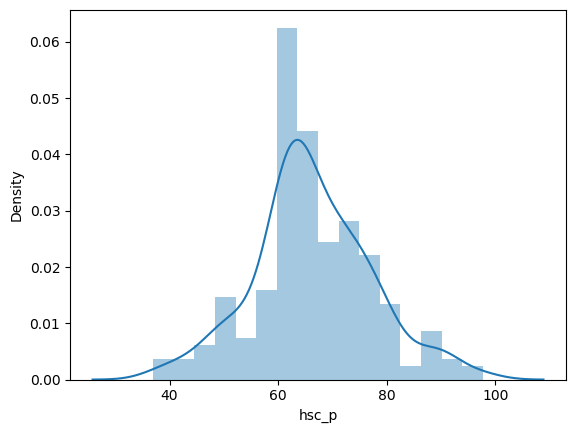

In [6]:

sns.distplot(dataset['hsc_p'])

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns           #we are importing the libraries.
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Green')#distplot is a function from seaborn library.
    #kde-Kernel Density Estimation
    #we have to give True ,to have bell shaped graph. with Red color.Histogram -Green color.
    pyplot.axvline(startrange,color='violet')#axvline=axis vertical line with violet colour in startrange and endrange.
    pyplot.axvline(endrange,color='violet')#we get the startrange and endrange value from the user
    #generate the sample
    sample=dataset 
    #calculate the parameters
    sample_mean=sample.mean()#we need the value of mean and standard deviation 
    sample_std=sample.std()
    print('Mean=%.3f,StandardDeviation=%.3f'%(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)#we use inbuild function for normal distribution.we import norm from scipy.stats.
    #from this norm we give mean and standard deviation as an input.from these norm it learns about the distribution pattern.
    #sample probabilities for a range of outcomes.
    values=[value for value in range(startrange,endrange)]#We do for loop in one line .in a single line it convert to list
    probabilities=[dist.pdf(value)for value in values]#we pass the values in dist.pdf using for loop to get the probability
    prob=sum(probabilities)#doing sumation for the Probability 
    print('The area between range({},{}):{}'.format(startrange,endrange,sum(probabilities)))
    prob

Mean=66.333,StandardDeviation=10.898
The area between range(40,70):0.6074756879907411


C:\sabeen\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


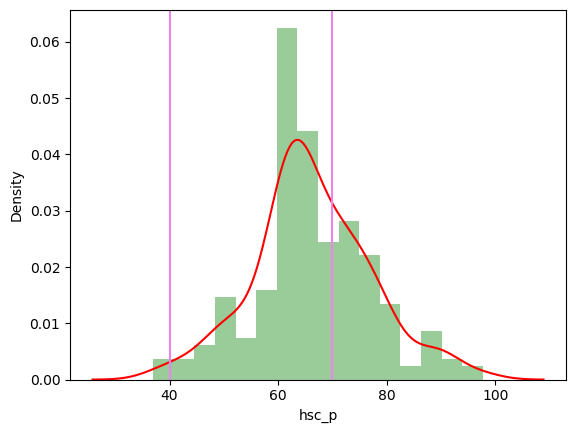

In [8]:
get_pdf_probability(dataset['hsc_p'],40,70)

In [9]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['ssc_p'])
ecdf(80)

0.8651162790697674

In [10]:
#convert Normal Distribution to Standard Normal Distribution 
def StdND_graph(dataset):#we give dataset as an input
    import seaborn as sns #seaborn is a library
    mean=dataset.mean()#we find Mean and Standard Deviation for the columns .
    std=dataset.std()
    #values=[value for value in dataset]#in this for loop .we converted the dataset into List.
    values=[]
    for value in dataset:
        values.append(value)
    z_score=[((j-mean)/std)for j in values]#To find Z-Score .We use the formula. j is value minus Mean divided by std .
    #then we do for loop for the values to get Z-score.
    sns.distplot(z_score,kde=True,kde_kws={'color':'red'},color='Green')#we have to give kde= True ,to have bell shaped graph.
    #with Red color.Histogram -Green color.
    sum(z_score)/len(z_score)#total sum of all the elements in z_score/number of elements in z_score to find the average.

C:\sabeen\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


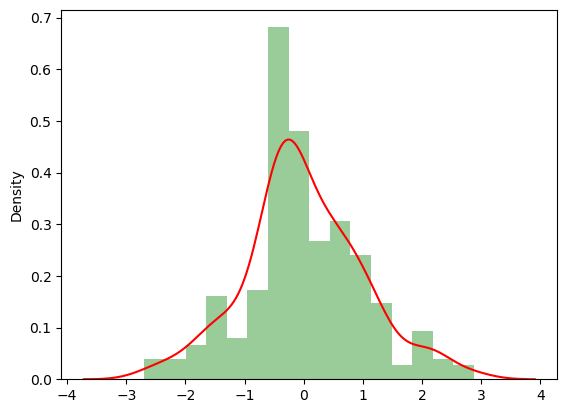

In [11]:
StdND_graph(dataset['hsc_p'])